In [31]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess,os
import matplotlib
from scipy.integrate import odeint
% matplotlib inline

#from Model import *
#from Model.model_RT_A import *
#basedir = os.path.expanduser('~/Documents/data/')

def cross_zero_index(value):
    return np.where(np.diff(np.sign(value)))[0]

def derivative_value(u, t, k):
    A, F = u
    dAdt = (k[0]+k[1]*A**3/(A**3+1))-(1+k[2]*F)*A
    dFdt = k[3]*(A-F)
    return [dAdt, dFdt]

def nc(A, k):
    temp = k[0]+k[1]*A**3/(A**3+1)
    return (temp/A-1)/k[2]



In [31]:


k_R = [2,100,50,0.1,0.001,1]
plt.figure(figsize=(10,10))
ax = plt.subplot(111,ylim=[0,2],xlim=[0,2])
A = np.linspace(0.00001, 3, 10000)
plt.plot(A,nc(A,k_R))
plt.plot(A,A,'k')


index = cross_zero_index( nc(A,k_R)-A )
ss = np.array([[A[i],nc(A,k_R)[i]] for i in index])
print ss

plt.plot(ss[:,0],ss[:,1],'ro')

c0 = ss[0,:];c0[0]=c0[0]*3;
c = odeint(derivative_value,c0,np.arange(0,100),args=tuple([k_R]))
plt.plot(c[:,0],c[:,1],'c')


[[ 0.27213631  0.27217535]
 [ 0.48575696  0.48573665]
 [ 1.03420997  1.03434485]]


In [2]:
def find_k0_range(A,k1,k2,k3,k4,k5):
    j=1
    ss=[]
    while (not (len(ss)==3))&(j<Ngrid):
        k_R=[k0_range[j],k1,k2,k3,k4,k5]
        index = cross_zero_index( nc(A,k_R)-A )
        ss = np.array([[A[i],nc(A,k_R)[i]] for i in index])
        j+=1
    jstart=j
    while (len(ss)==3)&(j<Ngrid):
        k_R=[k0_range[j],k1,k2,k3,k4,k5]
        index = cross_zero_index( nc(A,k_R)-A )
        ss = np.array([[A[i],nc(A,k_R)[i]] for i in index])
        j+=1
    jend=j
    if jstart<jend:
        k0_chosen=k0_range[max(0,jstart-1):min(Ngrid,jend+1)].tolist()
    else:
        k0_chosen = []
    return k0_chosen

k3=0.1;k4=0.01;k5=1;
Ngrid=101
k0_range=np.linspace(0,4,Ngrid)
A = np.linspace(10**-4, 3, 10000)
k1k2grid=[]
for k1 in np.linspace(10**-4, 100, 21):
    for k2 in np.linspace(10**-4, 50, 21):
        k1k2grid.append([k1,k2,find_k0_range(A,k1,k2,k3,k4,k5)])

    #c0 = ss[0,:];c0[0]=c0[0]*2;
    #c = odeint(derivative_value,c0,np.arange(0,100),args=tuple([k_R]))
    #if c[:,0].max()>c0[0]*2:


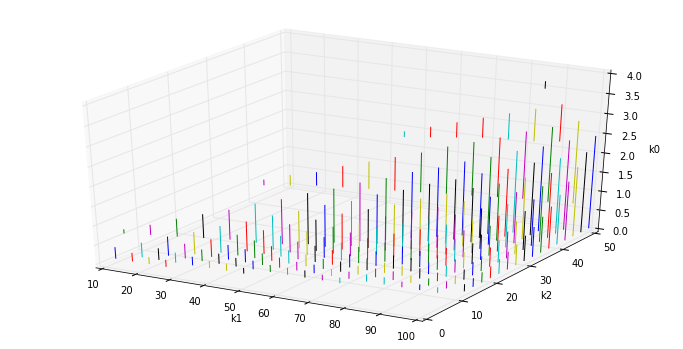

In [6]:
#%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('k1')
ax.set_ylabel('k2')
ax.set_zlabel('k0')


for row in k1k2grid:
    if len(row[2]):
        ax.plot([row[0],row[0]],[row[1],row[1]],[row[2][0],row[2][-1]])


In [8]:
len(k1k2grid)

441

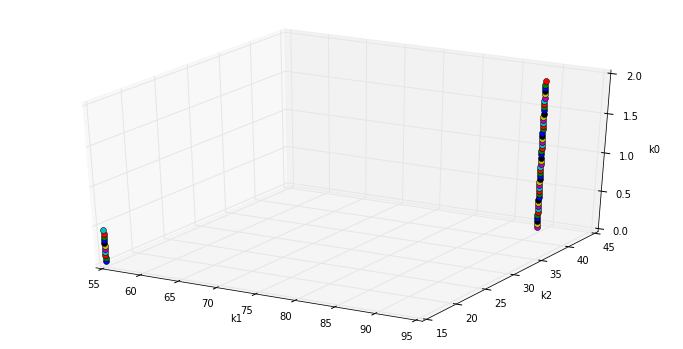

In [51]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('k1')
ax.set_ylabel('k2')
ax.set_zlabel('k0')



params=""
for row in k1k2grid[::79]:
    for i in range(len(row[2])):
        k0=row[2][i]
        k1=row[0]
        k2=row[1]
        ax.plot([k1],[k2],[k0],"o")
        k4=0.01
        name="{:.5g}_{:.5g}".format(k0,k4)
        txtinput="""{}
0.1,1000
0.01,1,0
{:.5g},{:.5g},{:.5g},0.1,{:.5g},1
0.001,0.01,0.0001
0,0.3,0.5,0.1,0.5,0.1\n;\n""".format(name,k0,k1,k2,k4)
        params+=txtinput

with open("params.txt","w") as f:
    f.write(params)

/Users/baixueyao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:15: ComplexWarning: Casting complex values to real discards the imaginary part


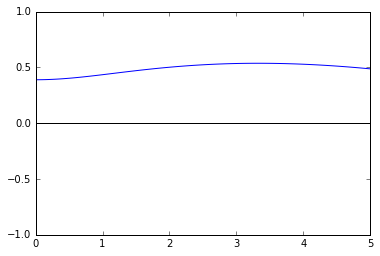

In [16]:
k_D=[0.01,0.1,0.001]
A,I,F = ss[0,0],k_R[5],ss[0,1]
dfdA=k_R[1]*3*A**2/(A**3+1)*I-(1+k_R[2]*F)
dfdI=k_R[0]+k_R[1]*A**3/(A**3+1)
dfdF=k_R[2]*A
NK=100
kvec=np.linspace(0,5,100)
eigVmax=np.zeros(NK)
for i in range(NK):
    k=kvec[i]
    M=[[dfdA-k_D[0]*k**2, dfdI, dfdF],
       [-dfdA, -dfdI-k_R[4]-k_D[1]*k**2, 0],
       [k_R[3], 0, -k_R[3]-k_D[2]*k**2]]
    eigV,eigVc = np.linalg.eig(M)
    eigVmax[i] = eigV.max()

plt.subplot(111,ylim=[-1,1])
plt.plot(kvec,eigVmax)
plt.axhline(0,color='k')

[3308]


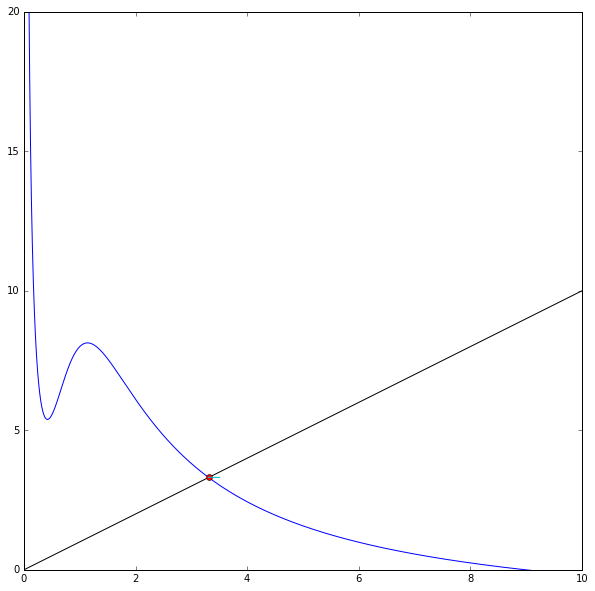

In [46]:
k_R = [1,8,0.5,0.1]#k2 vary 0.5-0.9
plt.figure(figsize=(10,10))
ax = plt.subplot(111,ylim=[0,20],xlim=[0,10])
A = np.linspace(0.00001, 10, 10000)
plt.plot(A,nc(A,k_R))
plt.plot(A,A,'k')


index = cross_zero_index( nc(A,k_R)-A )
print index
ss = np.array([[A[i],nc(A,k_R)[i]] for i in index])
plt.plot(ss[:,0],ss[:,1],'ro')

c0 = ss[0,:];c0[0]=c0[0]+0.2;
c = odeint(derivative_value,c0,np.arange(0,100),args=tuple([k_R]))
plt.plot(c[:,0],c[:,1],'c')



In [3]:
#find_params_bistable(100)
#np.savetxt('im.txt',frame,fmt='%s',delimiter="\t")

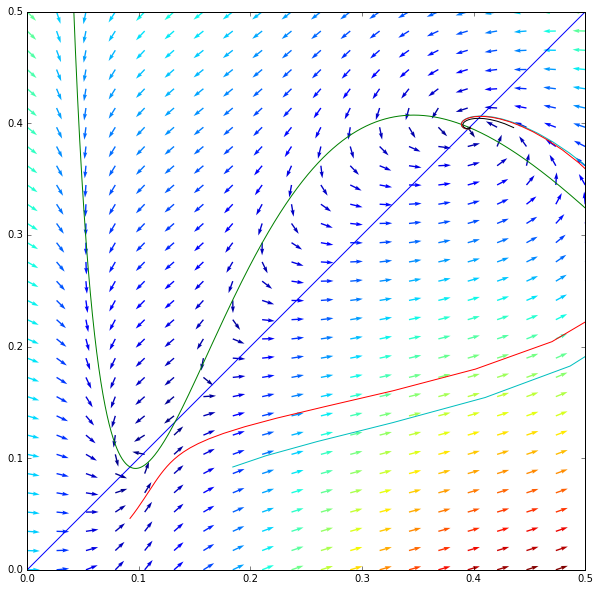

In [4]:

plt.figure(figsize=(10,10))
ax = plt.subplot(111,ylim=[0,0.5],xlim=[0,0.5])
RT = np.linspace(0.00001, 1, 10000)
plt.plot(RT,RT)
plt.plot(RT,nc_RT(RT,k_R))

c = odeint(derivative_value,[ss[0]*2,1,ss[0]],np.arange(0,t_total),args=tuple([k_R]))
plt.plot(c[:,0],c[:,2],'c')
c = odeint(derivative_value,[ss[0],1,ss[0]/2.0],np.arange(0,t_total),args=tuple([k_R]))
plt.plot(c[:,0],c[:,2],'r')
c = odeint(derivative_value,[ss[2]*1.1,1,ss[2]],np.arange(0,t_total),args=tuple([k_R]))
plt.plot(c[:,0],c[:,2],'k')
quiverplot(ax,k_R,0,0.5,20,0,0.5,30)

In [5]:
ss = solve_ss(k_R)
print ss
c0 = [ss[0],1,ss[0]]

span_time = 50
span_space = 4
k_D = [0.001,0.1,0.5]

stimulus_list = [[0, 0, 3, 2*ss[0], [2,2,0.2,0.2]]]
m = Skeleton2d(k_R, derivative_value, c0, span_time, span_space, stimulus_list, k_D, basedir)
m.__dict__

[0.092118289828982902, 0.13252192619261929, 0.39624566156615665]


{'c0': [0.092118289828982902, 1, 0.092118289828982902],
 'dir': '/Users/baixue/Documents/data/0.9509,0.3895,0.8693,0.1,0.0,0.0_0.001,0.1,0.5',
 'f_R': <function Model.model_RT_A.derivative_value>,
 'groupsize': 157,
 'h_space': 0.08,
 'h_time': 0.006369426751592357,
 'k_D': [0.001, 0.1, 0.5],
 'k_R': array([ 0.95087765,  0.38947365,  0.86932719,  0.1       ,  0.        ,  0.        ]),
 'n_chemical': 3,
 'n_space': 50,
 'span_space': 4,
 'span_time': 50,
 'stimulus_list': [[0, 0, 3, 0.1842365796579658, [2, 2, 0.2, 0.2]]]}

In [6]:
m.integrate()

In [7]:
plot_blue_red(c0,m.data,"../data/")

In [8]:
c0

[0.0054104860486048605, 1, 0.0054104860486048605]

In [ ]:
plot_blue_red([0,0,0],m.stimulus(),"../data/")

[-0.188889    1.90881453] 0.0953423573256
[ 0.8  1.2] 0.5
[-0.1413701   0.20890832] 0.435313998142


True

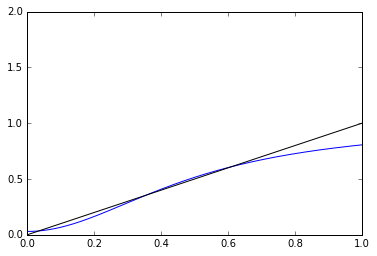

In [19]:
t_total = 10
t = np.arange(0,t_total)
k0,k1 = 0.97, 0.5
params = [k0, k1, 0, 0, 0, 1]
RT = np.linspace(0.00001,1,10000)
plt.subplot(111,ylim=[-0,2])
plt.plot(RT,nullcline_RT_RD.nc_RT(RT,params))
plt.plot(RT,RT,'k')
nullcline_RT_RD.params_bistable(params)



In [ ]:


c = odeint(reaction.derivative_value,[0.0001,1,0],t,args=tuple([params]))
plt.plot(t,c[:,0],'r')
plt.plot(t,c[:,1],'k')
plt.plot(t,c[:,2],'g')

plt.figure()
c = odeint(reaction.derivative_value,[0.3,1,0],t,args=tuple([params]))
plt.plot(t,c[:,0],'r')
plt.plot(t,c[:,1],'k')
plt.plot(t,c[:,2],'g')





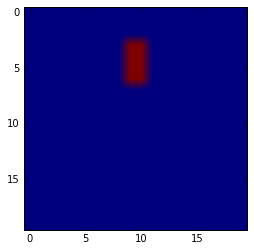

In [10]:
info = [1,2,0.5,0.3]#centerx,centery,widthx,widthy in micrometer

z = stimulus_square(n_space, [1,2,0.5,0.3])
plt.imshow(z,interpolation='nearest')

In [51]:
span_space = 4
n_space = 20
chemical = 0
start = 1
lifetime = 3
amp = 1

z = stimulus(2.2, chemical, start, lifetime, amp, [1,2,0.2,0.4])

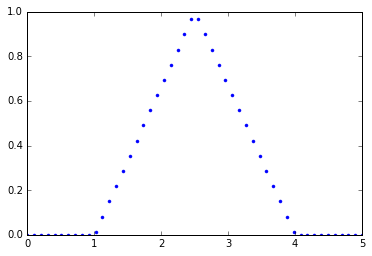

In [52]:
plt.plot(np.linspace(0,5),[stimulus(t, chemical, start, lifetime, amp, [1,2,0.2,0.4]).max() for t in np.linspace(0,5)],'.')

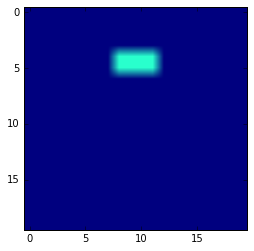

In [53]:
plt.imshow(z[:,chemical].reshape((n_space,n_space)),vmin=0,vmax=2)

In [19]:
from integrate import *
import itertools
params_chosen = np.load('params_list.npy')

k5 = [0,10]
span_time = [15]
k_D = [[0.05,0.1,0.001],[0.1,0.1,0.001],[0.1,0.5,0.001]]
noise = [[0.01,0.01]]
params2d = [num2str(*temp) for temp in list(itertools.product(params_chosen.tolist(),k5,span_time,k_D,noise))]
np.savetxt('params2d.txt',params2d,fmt='%s')

(41, 6)


<matplotlib.colorbar.Colorbar instance at 0x7f9c6ca5f170>

/software/python-2.7-2015q2-el6-x86_64/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


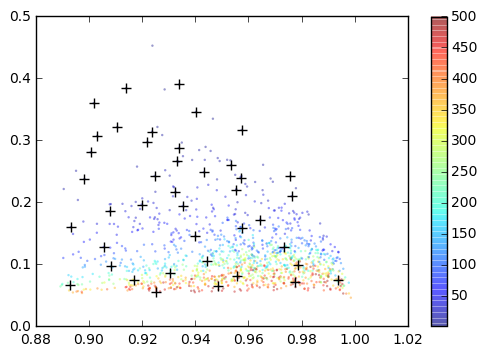

In [4]:
import scipy.spatial

params_list = np.load('params_list.npy')
index = np.random.choice(np.arange(len(params_list)), size=1000, replace=False)
params_chosen = params_list[index,:]
tree = scipy.spatial.KDTree(params_chosen[:,:2])
ndx = tree.query_pairs(0.015)
pair_index = []
for (i,j) in ndx:
    pair_index += [i]
params_chosen = np.delete(params_chosen,np.unique(pair_index),0)
print params_chosen.shape
np.save('params_list_'+tstamp(),params_chosen)

cb = plt.scatter(params_list[:,0],params_list[:,1],c=params_list[:,2],lw=0,alpha=0.4,s=3)
plt.scatter(params_chosen[:,0],params_chosen[:,1],c='k',lw=1,s=50, marker='+')
plt.colorbar(cb)

(60, 6)


<matplotlib.colorbar.Colorbar instance at 0x7fda81ee1d88>

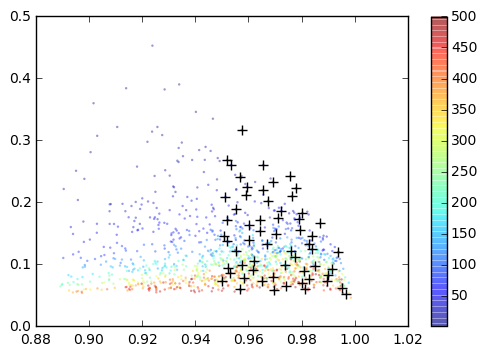

In [8]:
import scipy.spatial

params_list = np.load('params_list.npy')
params_chosen = params_list[params_list[:,0]>0.95,:]
tree = scipy.spatial.KDTree(params_chosen[:,:2])
ndx = tree.query_pairs(0.007)
pair_index = []
for (i,j) in ndx:
    pair_index += [i]
params_chosen = np.delete(params_chosen,np.unique(pair_index),0)
print params_chosen.shape
np.save('params_list_'+tstamp(),params_chosen)

cb = plt.scatter(params_list[:,0],params_list[:,1],c=params_list[:,2],lw=0,alpha=0.4,s=3)
plt.scatter(params_chosen[:,0],params_chosen[:,1],c='k',lw=1,s=50, marker='+')
plt.colorbar(cb)

In [32]:
existed = os.listdir("/home/baixue/RD_RT_A/result/")
with open('params2d.txt') as f:
    tasklist = f.readlines() 
finishedlist = [task.strip('\n') for task in tasklist if task.strip('\n')+'.npy' in existed]
print finishedlist[::7]
finishedlist_unique = [task for task in finishedlist if ',0_' in task]
finishedlist_unique

['0.977614,0.072063,323.775549,0.1,0.01,0_9_0.0100,0.1000,0.0010_0.100,0.100', '0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.1000,0.0100_0.100,0.100']


['0.977614,0.072063,323.775549,0.1,0.01,0_9_0.0100,0.1000,0.0010_0.100,0.100',
 '0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.1000,0.0010_0.100,0.100',
 '0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.5000,0.0010_0.100,0.100',
 '0.977614,0.072063,323.775549,0.1,0.01,0_9_0.0100,0.1000,0.0100_0.100,0.100',
 '0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.1000,0.0100_0.100,0.100',
 '0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.5000,0.0100_0.100,0.100']

In [26]:
from integrate import *

plot_list,filelist = [],[]
for f in finishedlist_unique:#os.listdir("/home/baixue/RD_RT_A/result/"):
    params,span_time,k_D,noise = str2num(f)
    c = np.load("result/"+f+".npy")
    ss = solve_ss(params)
    plot_list.append(params[:3]+[c[5:,:,0].max()-ss[0]])
    filelist.append(f)
filelist = np.array(filelist)


plot_list

[[0.900609, 0.281101, 9.566276, 0.060188629413353345],
 [0.900609, 0.281101, 9.566276, 0.032783334304617828],
 [0.900609, 0.281101, 9.566276, 0.033499154555650945],
 [0.910638, 0.321726, 6.610315, 0.041698223924967789],
 [0.910638, 0.321726, 6.610315, 0.022548799869995764],
 [0.910638, 0.321726, 6.610315, 0.023031869726327384],
 [0.898273, 0.238022, 13.3549, 0.067642243919874001],
 [0.898273, 0.238022, 13.3549, 0.043408895098596939],
 [0.898273, 0.238022, 13.3549, 0.044351996566380253],
 [0.913988, 0.384219, 3.154245, 0.028826681508432789],
 [0.913988, 0.384219, 3.154245, 0.016425230733157714],
 [0.913988, 0.384219, 3.154245, 0.016748123970313278],
 [0.901722, 0.360044, 3.55221, 0.060563998032233168],
 [0.901722, 0.360044, 3.55221, 0.033339824732981499],
 [0.901722, 0.360044, 3.55221, 0.033953810932147527],
 [0.903104, 0.307461, 6.69161, 0.065454521725023376],
 [0.903104, 0.307461, 6.69161, 0.035142579494783208],
 [0.903104, 0.307461, 6.69161, 0.035843985459630565],
 [0.923758, 0.31423

<matplotlib.colorbar.Colorbar instance at 0x7f47f69c5cf8>

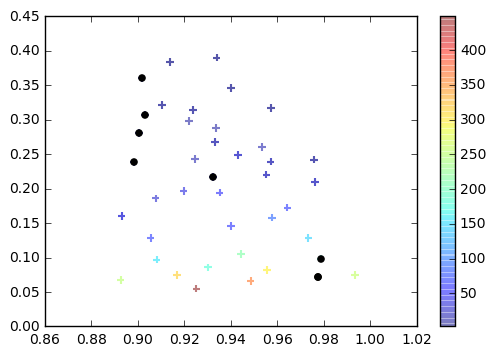

In [28]:
plot_list = np.array(plot_list)
cb = plt.scatter(plot_list[:,0],plot_list[:,1],c=plot_list[:,2],lw=1.5,alpha=0.3,s=30, marker='+')
mask = plot_list[:,3]>0.05
plt.scatter(plot_list[mask,0],plot_list[mask,1],c='k',lw=0,alpha=1,s=30, marker='o')
plt.colorbar(cb)

In [33]:
os.popen('rm -r plots/*')
openlist = []
for f in finishedlist_unique:#filelist[mask]:
    pattern = f.split("_")[0][:-10]
    cmd = "find result/ "+"-name '"+pattern+"*"+"' -type d; mkdir plots/"+pattern
    filelist_group = subprocess.Popen(cmd,stdout=subprocess.PIPE, shell=True).communicate()[0].split("\n")[:-1]
    filelist_group.sort()
    print filelist_group
    grouplist = []
    for temp in filelist_group:
        cmd = "cp -r "+temp+" plots/"+pattern+"/"+temp.strip("result/")
        subprocess.Popen(cmd,stdout=subprocess.PIPE, shell=True).communicate()[0].split("\n")[:-1]
        grouplist.append(" plots/"+pattern+"/"+temp.strip("result/"))
    openlist.append(grouplist)


['result/0.977614,0.072063,323.775549,0.1,0.01,0_45_0.0500,0.1000,0.0010_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,0_45_0.1000,0.1000,0.0010_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,0_9_0.0100,0.1000,0.0010_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,0_9_0.0100,0.1000,0.0100_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.1000,0.0010_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.1000,0.0100_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.5000,0.0010_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,0_9_0.1000,0.5000,0.0100_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,10_45_0.0500,0.1000,0.0010_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,10_45_0.1000,0.1000,0.0010_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,4_9_0.0100,0.1000,0.0010_0.100,0.100', 'result/0.977614,0.072063,323.775549,0.1,0.01,4_9_0.0100,0

In [31]:
np.savetxt('openlist.txt',openlist,fmt='%s',delimiter=";")
#scp baixue@midway.rcc.uchicago.edu:~/RD_RT_A/openlist.txt  ~/Desktop/



In [ ]:
from integrate import *
with open('filelist.txt') as f:
    tasklist = f.readlines() 

for task in tasklist:
    task = task.strip('\n')
    print task
    plot_c(np.load("result/"+task+'.npy'),task+"/")
    temp = task.replace(',0_',',1_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")
    temp = task.replace(',0_',',2_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")
    temp = task.replace(',0_',',3_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")
    temp = task.replace(',0_',',4_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")
    temp = task.replace(',0_',',5_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")
    temp = task.replace(',0_',',6_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")
    temp = task.replace(',0_',',7_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")
    temp = task.replace(',0_',',8_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")
    temp = task.replace(',0_',',9_')
    plot_c(np.load("result/"+temp+'.npy'),temp+"/")



0.982640,0.076513,245.798320,0.1,0.01,1_90_0.0100,0.1000,0.0010_0.050,0.000


In [ ]:
def c_reshape_midline(c):
    n_time = c.shape[0]
    n_space = int(np.sqrt(c.shape[1]))
    lines = [np.zeros((n_time,n_space)),np.zeros((n_time,n_space)),np.zeros((n_time,n_space))]
    for i in range(n_time):
        lines[0][i,:] = c[i,:,0].reshape((n_space,n_space))[n_space/2,:]
        lines[1][i,:] = c[i,:,1].reshape((n_space,n_space))[n_space/2,:]
        lines[2][i,:] = c[i,:,2].reshape((n_space,n_space))[n_space/2,:]
    return lines

def ic_square_2d(center,edge,sigma):
    from scipy import ndimage
    global n_space
    aspect_ratio = 2
    i_begin,i_end = int(n_space/2-sigma*n_space/2),int(n_space/2+sigma*n_space/2)
    i_begin_l,i_end_l = int(n_space/2-aspect_ratio*sigma*n_space/2),int(n_space/2+aspect_ratio*sigma*n_space/2)
    z = np.ones((n_space, n_space), dtype=float)*edge
    z[i_begin:i_end,i_begin_l:i_end_l] = center
    z = ndimage.filters.gaussian_filter(z,1)
    return z.ravel()




In [4]:
params_list[:,:3]

array([[  9.38653267e-01,   8.18995606e-02,   2.52599449e+02],
       [  9.66133456e-01,   8.20090887e-02,   4.43091135e+02],
       [  9.53215301e-01,   1.08610832e-01,   2.74791952e+02],
       ..., 
       [  9.83809339e-01,   1.45878506e-01,   6.79169697e+01],
       [  9.21115251e-01,   9.04982267e-02,   1.57963391e+02],
       [  9.62163325e-01,   1.05789019e-01,   1.47006955e+02]])

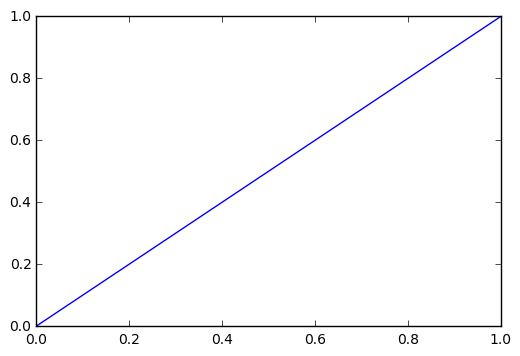

In [62]:
params = [0.9999,0.7,10,0.1000,0.0100,1000]
RT = np.linspace(0.1**10,1,10000)
plt.subplot(111,ylim=[0,1])
plt.plot(RT,RT)
plt.plot(RT,f1(RT,params))

In [43]:
rtype = 3; span_time = 60; k_D = [0.01,0.1,0.001]; noise = [0.10,0]; 
info_2d = '{:d}_{:d}_{:.3f}_{:.3f}_{:.3f}_{:.3f}_{:.1f}'.format(rtype,span_time,k_D[0],k_D[1],k_D[2],noise[0],noise[1])
files_0d = subprocess.Popen('ls result/0d*',stdout=subprocess.PIPE, shell=True).communicate()[0].strip().split('\n')
cmd = ['python integrate.py '+f+' '+info_2d+"; sed -e '1d' file_first_screen.txt;" for f in files_0d]
print cmd[0]
np.savetxt('file_first_screen.txt',cmd, fmt="%s")
#cat slurmhead.sh > run_first_screen.sh; cat file_first_screen.txt >> run_first_screen.sh

python integrate.py result/0d_0.npz 3_60_0.010_0.100_0.001_0.100_0.0; sed -e '1d' file_first_screen.txt;


In [2]:
files_2d = subprocess.Popen('ls result/*3_60_0.010_0.100_0.001_0.100_0.0_*',stdout=subprocess.PIPE, shell=True).communicate()[0].strip().split('\n')

print files_2d[:10]
print len(files_2d)

['result/2d:3_60_0.010_0.100_0.001_0.100_0.0_0.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_100.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_101.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_102.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_103.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_104.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_105.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_106.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_107.npy', 'result/2d:3_60_0.010_0.100_0.001_0.100_0.0_108.npy']
45


In [5]:
arr = np.zeros((len(files_2d),4))
fn0d = [None]*len(files_2d)
for i,f in enumerate(files_2d):
    c = np.load(f)
    f0d = 'result/0d_'+f.split('_')[-1][:-4]+'.npz'
    ff = np.load(f0d)
    arr[i,:3] = ff['params'][:3]
    arr[i,3] = c[:,:,0].max()-ff['ss'][0]
    fn0d[i] = f0d
np.save('params_array.npy',arr)

In [4]:
import os
os.chdir("/home/baixue/RD_RT_A/")

In [17]:
files_2d = np.array(files_2d)
files_second_screen = files_2d[np.where(arr[:,3]>0.1)[0]]
cmd = ['python plot.py '+f for f in files_second_screen]
print cmd[:4]
np.savetxt('plot.sh',cmd, fmt="%s")



['python plot.py result/2d:3_60_0.010_0.100_0.001_0.100_0.0_100.npy', 'python plot.py result/2d:3_60_0.010_0.100_0.001_0.100_0.0_102.npy', 'python plot.py result/2d:3_60_0.010_0.100_0.001_0.100_0.0_107.npy', 'python plot.py result/2d:3_60_0.010_0.100_0.001_0.100_0.0_113.npy']
